In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [25]:
data=pd.read_csv('weather_data.csv')
data

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [26]:
data.head()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26


In [27]:
data.shape

(12113, 7)

In [28]:
data.describe()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
count,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000,12113.000000
mean,2006.084207,182.365475,1.311912,15.207111,74.635416,7.183984,25.038147
std,9.573148,105.730770,0.539321,5.529803,15.286193,13.126254,4.373427
min,1990.000000,1.000000,0.440000,2.620000,15.810000,0.000000,11.190000
25%,1998.000000,90.000000,0.950000,9.950000,65.250000,0.000000,21.430000
50%,2006.000000,182.000000,1.150000,16.170000,79.620000,1.160000,26.930000
75%,2014.000000,274.000000,1.520000,20.570000,86.560000,9.260000,28.400000
max,2023.000000,366.000000,5.340000,24.290000,96.120000,170.630000,35.490000


In [29]:
data.isnull().sum()

Year                 0
Day                  0
Wind Speed           0
Specific Humidity    0
Relative Humidity    0
Precipitation        0
Temperature          0
dtype: int64

In [30]:
data.dropna()

,Year,Day,Wind Speed,Specific Humidity,Relative Humidity,Precipitation,Temperature
0,1990,1,1.08,5.68,53.06,0.0,16.33
1,1990,2,1.13,5.92,58.06,0.0,15.68
2,1990,3,1.33,5.68,52.69,0.0,16.56
3,1990,4,1.09,5.19,47.19,0.0,17.09
4,1990,5,0.94,4.82,42.88,0.0,17.26
...,...,...,...,...,...,...,...
12108,2023,56,1.28,8.85,50.44,0.0,24.52
12109,2023,57,1.41,6.59,38.06,0.0,24.62
12110,2023,58,1.60,6.04,34.56,0.0,24.28
12111,2023,59,1.49,6.65,38.94,0.0,23.97


In [31]:
data.notnull().sum()

Year                 12113
Day                  12113
Wind Speed           12113
Specific Humidity    12113
Relative Humidity    12113
Precipitation        12113
Temperature          12113
dtype: int64

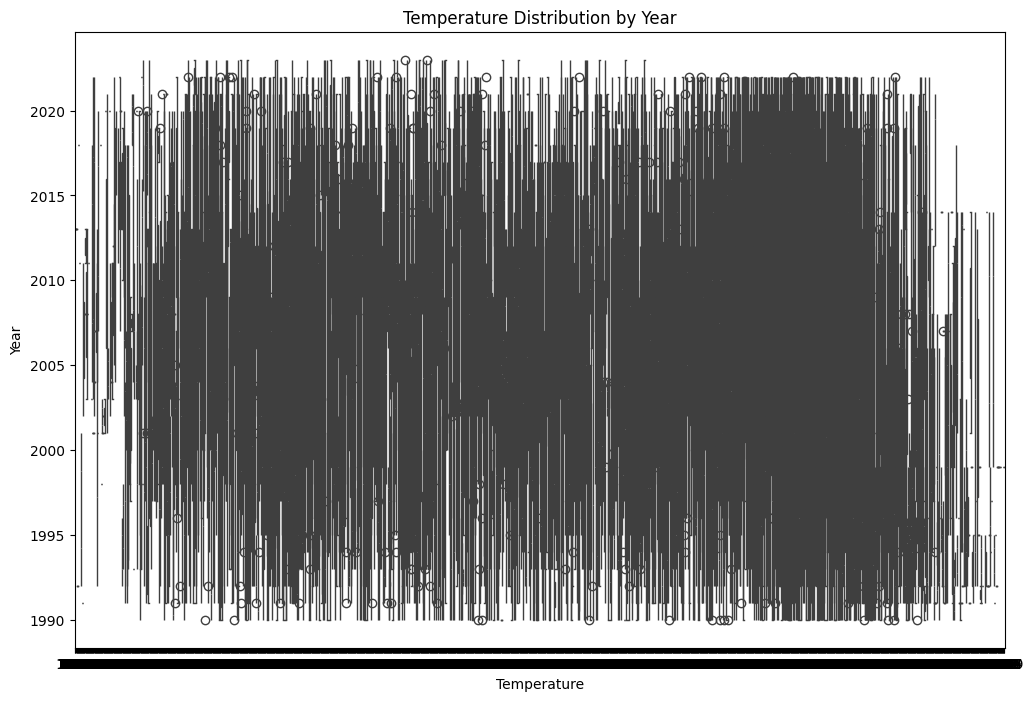

In [32]:
# Create boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(y='Year',x='Temperature', data=data)
plt.title('Temperature Distribution by Year')
plt.xlabel('Temperature')
plt.ylabel('Year')
plt.show()

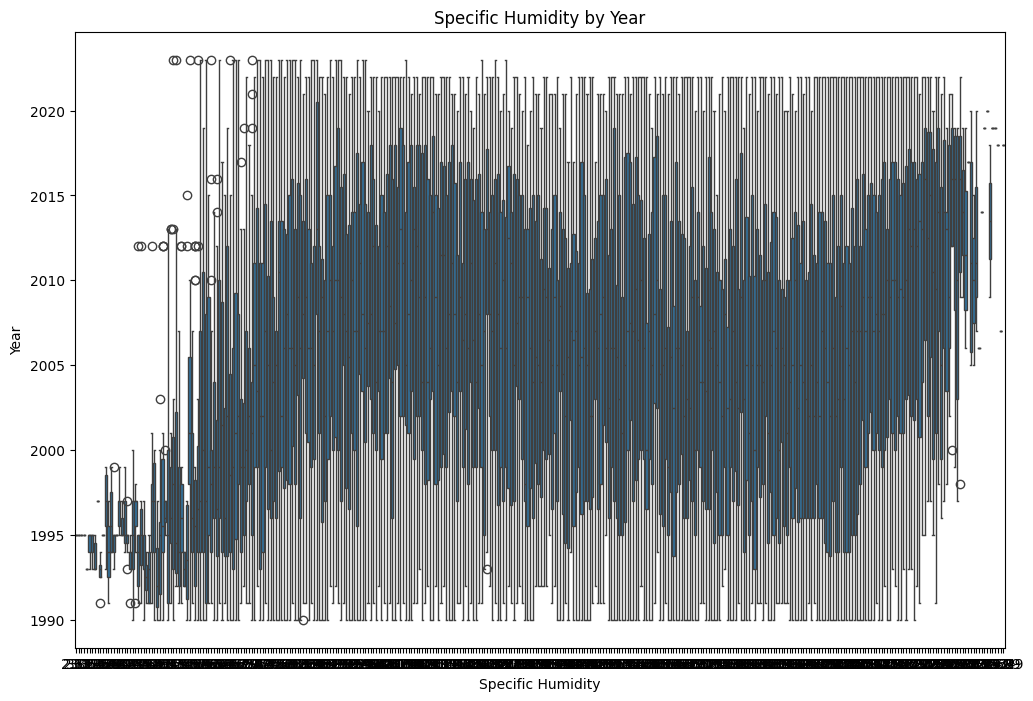

In [33]:
# Create boxplot using Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(y='Year', x='Specific Humidity', data=data)
plt.title('Specific Humidity by Year')
plt.show()

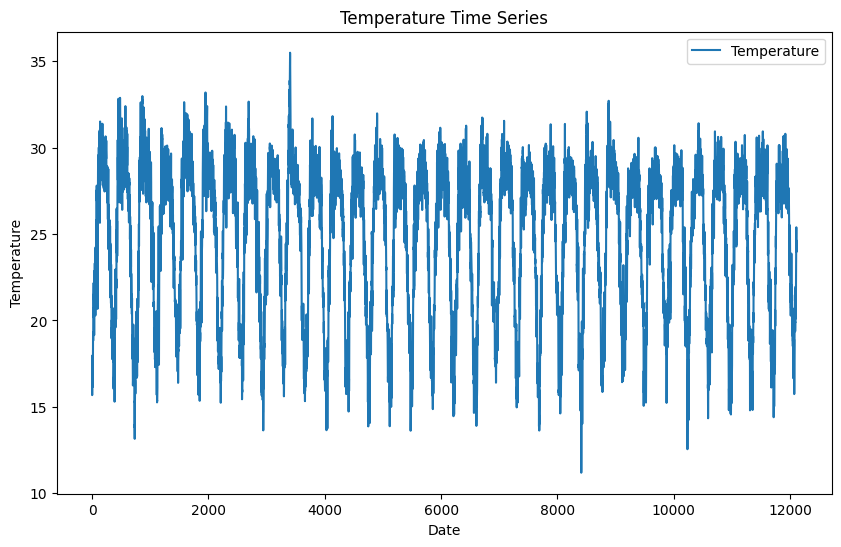

ADF Statistic: -11.551618629855165
p-value: 3.436515118758798e-21
Series is stationary


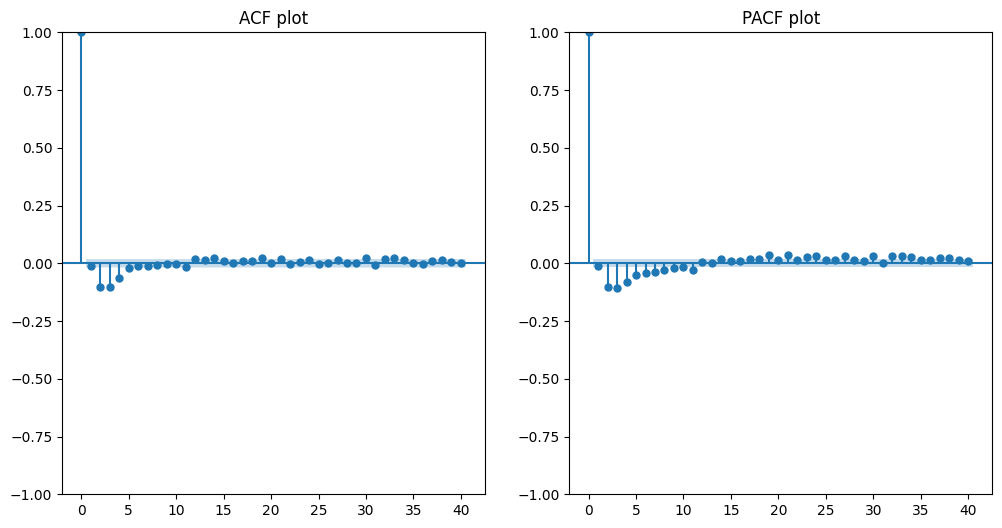

                               SARIMAX Results                                
Dep. Variable:            Temperature   No. Observations:                12113
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -14416.237
Date:                Mon, 07 Oct 2024   AIC                          28842.474
Time:                        19:54:34   BIC                          28879.484
Sample:                             0   HQIC                         28854.883
                              - 12113                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9870      0.077     12.763      0.000       0.835       1.139
ar.L2         -0.3144      0.061     -5.164      0.000      -0.434      -0.195
ma.L1         -1.0317      0.079    -13.096      0.0

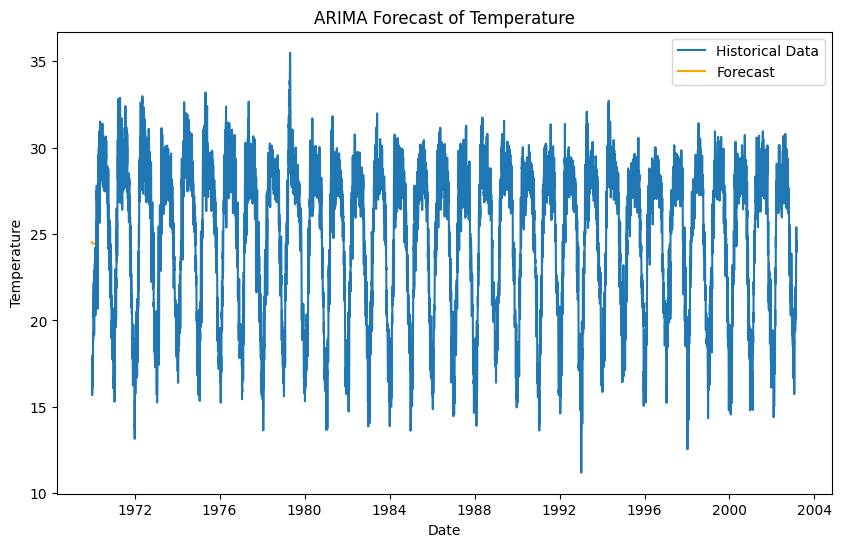

In [34]:
# Step 1: Visualize the time series
plt.figure(figsize=(10, 6))
plt.plot(data['Temperature'], label='Temperature')
plt.title('Temperature Time Series')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# Step 2: Check for stationarity using the Augmented Dickey-Fuller (ADF) test
def check_stationarity(timeseries):
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] > 0.05:
        print("Series is non-stationary")
    else:
        print("Series is stationary")

check_stationarity(data['Temperature'])

# Step 3: Perform differencing if necessary (only if the series is non-stationary)
data['Temperature_diff'] = data['Temperature'].diff().dropna()

# Step 4: Plot ACF and PACF to determine ARIMA parameters
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(data['Temperature_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('ACF plot')
plt.subplot(122)
plot_pacf(data['Temperature_diff'].dropna(), lags=40, ax=plt.gca())
plt.title('PACF plot')
plt.show()

# Step 5: Fit the ARIMA model
# Specify your (p, d, q) values based on ACF/PACF plots
# Example: ARIMA(2, 1, 2)
model = ARIMA(data['Temperature'], order=(2, 1, 2))
model_fit = model.fit()

# Step 6: Print the model summary
print(model_fit.summary())

# Step 7: Forecast future values (e.g., next 30 periods)
forecast_steps = 30
forecast = model_fit.forecast(steps=forecast_steps)

# Step 8: Visualize the forecast along with historical data
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temperature'], label='Historical Data')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='orange')
plt.title('ARIMA Forecast of Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

Standard Errors (std err):
ar.L1     0.077335
ar.L2     0.060880
ma.L1     0.078779
ma.L2     0.069732
sigma2    0.006345
dtype: float64


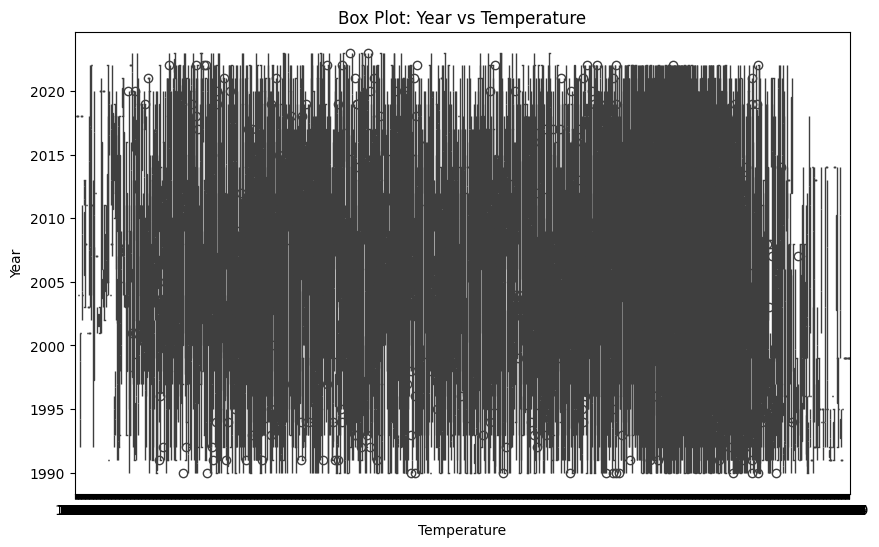

In [35]:
model = ARIMA(data['Temperature'], order=(2, 1, 2))  # Using (2, 1, 2) as an example
model_fit = model.fit()

# Extracting standard errors (from the ARIMA model summary)
model_summary = model_fit.summary()
std_errors = model_fit.bse  # This will give you the standard errors

# Print out the standard errors
print("Standard Errors (std err):")
print(std_errors)

#Create a box plot of Year vs Temperature
plt.figure(figsize=(10, 6))
sns.boxplot(y='Year', x='Temperature', data=data)
plt.title('Box Plot: Year vs Temperature')
plt.ylabel('Year')
plt.xlabel('Temperature')
plt.show()